# 📊 In-Class Exercise: Distribution Analysis & Risk Modeling

## ⏱ Duration: 60 minutes  
**Format**: Individual or Pair Work  
**Tools**: Jupyter Notebook or Google Colab, Python (NumPy, Pandas, Matplotlib, SciPy)

### ✅ Learning Objectives Covered
- Differentiate between discrete and continuous random variables  
- Simulate and analyze distributions using Python  
- Plot PDF/CDF for normal distribution  
- Calculate probabilities using CDF  
- Model financial data and estimate Value at Risk (VaR)

## 🔹 Part 1: Simulate a Discrete Random Variable (10 minutes)
Simulate rolling a fair 6-sided die 1000 times.

*   Simulate die rolls using randint method
*   Generate a frequency table (how often each die value appears)
*   Visualize the relative frequency of die rolls using a bar chart


In [4]:
import numpy as np
np.random.seed(42)
rolls = np.random.randint(1, 7, size=1000)
print(rolls[:20])

[4 5 3 5 5 2 3 3 3 5 4 3 6 5 2 4 6 6 2 4]


Frequency distribution: [181 164 154 174 172 155]


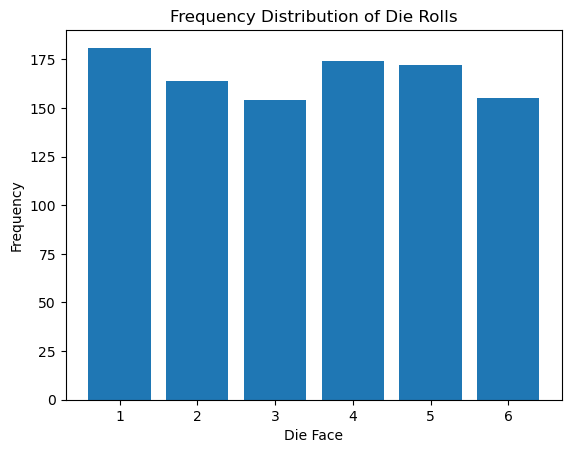

In [7]:
# generate frequency distribution
roll_count = np.bincount(rolls)[1:]  # ignore index 0
print("Frequency distribution:", roll_count)

# generate bar chart using matplotlib
import matplotlib.pyplot as plt
plt.bar(range(1, 7), roll_count)
plt.xlabel('Die Face')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Die Rolls')
plt.xticks(range(1, 7))
plt.show()

In [8]:
#dataframe method
import pandas as pd
rolls_df = pd.DataFrame(rolls, columns=['Die Roll'])
type(rolls_df)

pandas.core.frame.DataFrame

In [11]:
table_freq = rolls_df['Die Roll'].value_counts().sort_index()
rel_freq = table_freq/len(rolls_df)
print(rel_freq)

Die Roll
1    0.181
2    0.164
3    0.154
4    0.174
5    0.172
6    0.155
Name: count, dtype: float64


**Questions:**
1. What do you observe in the relative frequency chart?
2. Is this variable discrete or continuous?

In [ ]:
# distributions close to average, as expected for a fair die
# The relative frequencies are close to 1/6 for each face

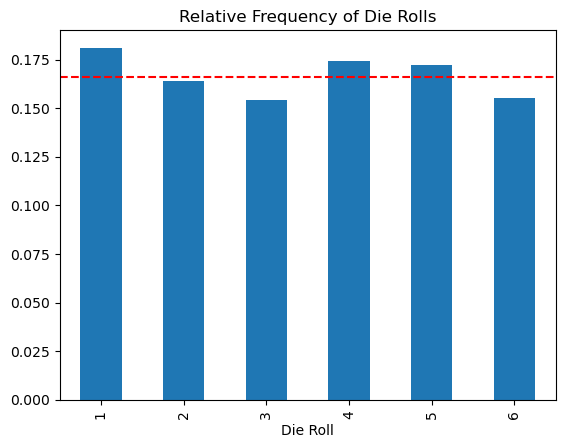

In [13]:
rel_freq.plot(kind='bar', title='Relative Frequency of Die Rolls')
plt.axhline(y=0.166, color='r', linestyle='--', label='Baseline')
plt.show()

## 🔹 Part 2: Visualizing a Continuous Distribution (15 minutes)
Simulate stock return as a standard normal distribution and plot the PDF and CDF.

In [24]:
from scipy.stats import norm
mean = 0 
std = 1
x = np.linspace(-4,4,1000)

pdf = norm.pdf(x, mean, std)
cdf = norm.cdf(x, mean, std)


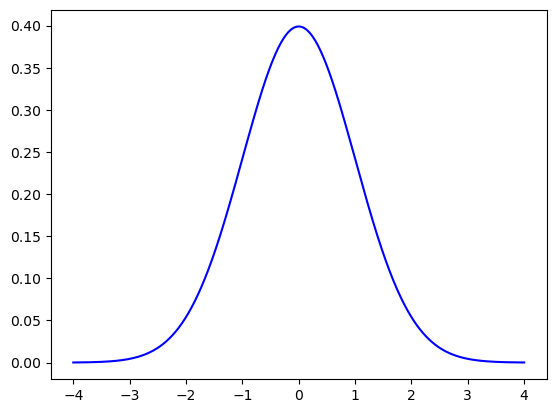

In [20]:
plt.plot(x,pdf, color='blue', label='PDF')
plt.show()

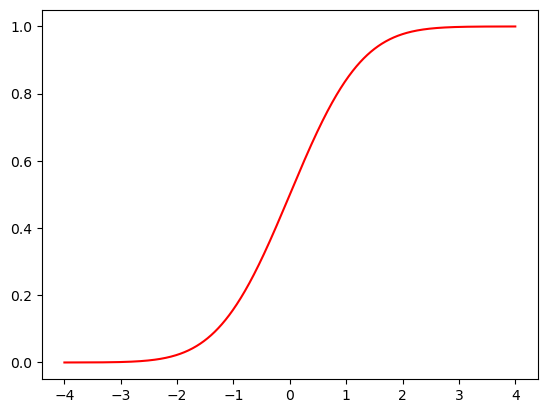

In [21]:
plt.plot(x,cdf, color='red', label='PDF')
plt.show()

**Questions:**
- What does the PDF tell us about likely returns?
- What does the CDF value at 0.5 represent?

## 🔹 Part 3: Calculate Probability of Extreme Loss (10 minutes)

In [29]:
# Calculate probability of daily loss > 5%
norm.cdf(-0.05, mean, std)

0.4800611941616275

**Challenge:** What is the probability of a gain of more than 5%?

In [30]:
1-norm.cdf(0.05, mean, std)

0.4800611941616275

## 🔹 Part 4: Estimate and plot 95% Value at Risk (VaR) (15 minutes)

In [35]:
# Estimate 95% VaR
VaR_95 = norm.ppf(1-0.95, mean, std)
print("95% VaR:", VaR_95)

95% VaR: -1.6448536269514722


**Follow-up:** What does a 95% VaR of -1.64 mean in plain language?

In [ ]:
# it means that there is a 5% chance that the daily loss will exceed this value

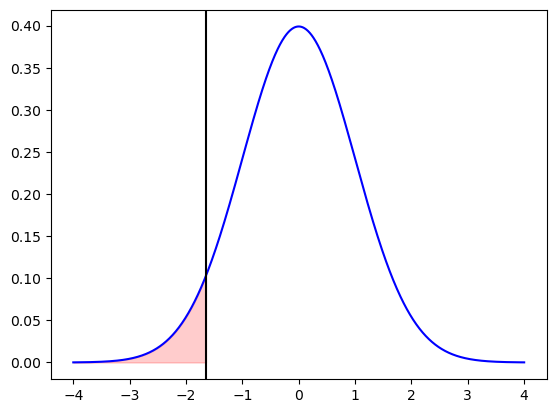

In [37]:
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, where=(x < VaR_95), color='red', alpha=0.2, label='VaR Area')
plt.axvline(x=VaR_95, color='black')
plt.show()

## 🔹 Part 5 (Optional): Extend to Annual Return (10 minutes)

*   Assuming 220 trading days
*   Probability of yearly loss > 40%



In [39]:
y_mean = mean * 220
y_std = std*np.sqrt(220)
norm.cdf(-0.4, y_mean, y_std)



0.48924263071625496